In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load CSV files
interpolation_df = pd.read_csv('interpolation.csv')
no_interpolation_df = pd.read_csv('no_interpolation.csv')
interpolation_sampled = interpolation_df.groupby(['n', 'Max_Iterations']).apply(lambda x: x.sample(10, replace=True)).reset_index(drop=True)
no_interpolation_sampled = no_interpolation_df.groupby(['n', 'Max_Iterations']).apply(lambda x: x.sample(10, replace=True)).reset_index(drop=True)

combined_sampled = pd.concat([interpolation_sampled, no_interpolation_sampled], axis=0).sort_values(by='n').reset_index(drop=True)
combined_sampled

,Position_Error,Rotation_Error,n,Max_Iterations
0,0.182549,3.048403,0,10
1,0.620945,1.737529,0,3
2,0.405104,4.298621,0,3
3,0.492345,2.005253,0,3
4,0.481900,4.140517,0,3
...,...,...,...,...
1095,0.068720,0.535482,10,8
1096,0.179152,0.450619,10,8
1097,0.067549,0.873683,10,8
1098,0.055165,2.616978,10,8


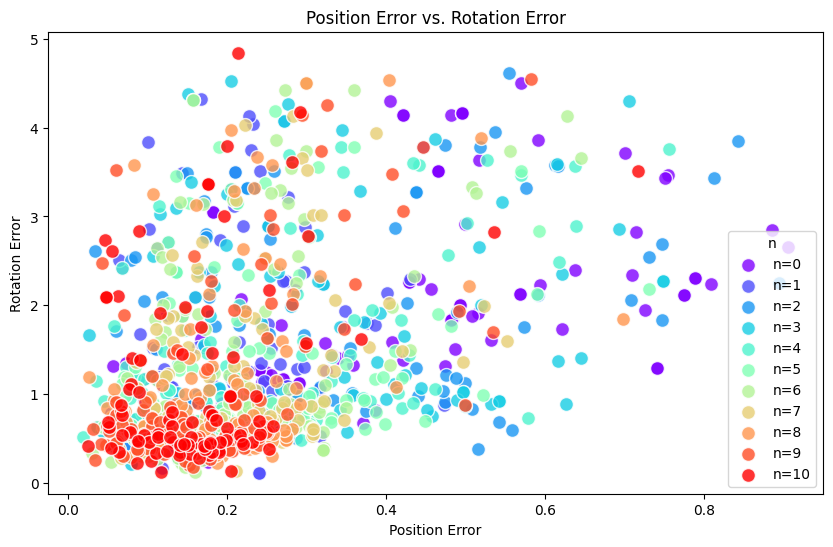

In [3]:
n_values = combined_sampled['n'].unique()
n_colors = len(n_values)

# Generate a rainbow color map
colors = plt.cm.rainbow(np.linspace(0, 1, n_colors))

# Create a dictionary to map 'n' values to colors
color_map = {n: colors[i] for i, n in enumerate(n_values)}

# Create the scatter plot
plt.figure(figsize=(10, 6))
for n in n_values:
    subset = combined_sampled[combined_sampled['n'] == n]
    plt.scatter(subset['Position_Error'], subset['Rotation_Error'], 
                color=color_map[n], label=f'n={n}', s=100, edgecolor='w', alpha=.8)

# Add titles and labels
plt.title('Position Error vs. Rotation Error')
plt.xlabel('Position Error')
plt.ylabel('Rotation Error')
plt.legend(title='n')

# Show the plot
plt.show()

Interpolation Summary Statistics:
     n  Pos_Err_Mean  Pos_Err_Std  Pos_Err_Min  Pos_Err_Max  Rot_Err_Mean  \
0    0          0.40         0.20         0.06         1.09          1.75   
1    1          0.20         0.10         0.02         0.73          1.64   
2    2          0.31         0.19         0.02         0.89          1.75   
3    3          0.27         0.17         0.01         0.94          1.61   
4    4          0.25         0.15         0.02         1.03          1.49   
5    5          0.24         0.14         0.01         0.89          1.39   
6    6          0.23         0.13         0.01         0.87          1.35   
7    7          0.21         0.12         0.02         0.89          1.23   
8    8          0.20         0.12         0.01         0.88          1.14   
9    9          0.19         0.10         0.02         0.89          1.08   
10  10          0.18         0.10         0.02         0.80          1.01   

    Rot_Err_Std  Rot_Err_Min  Rot_Err_Max

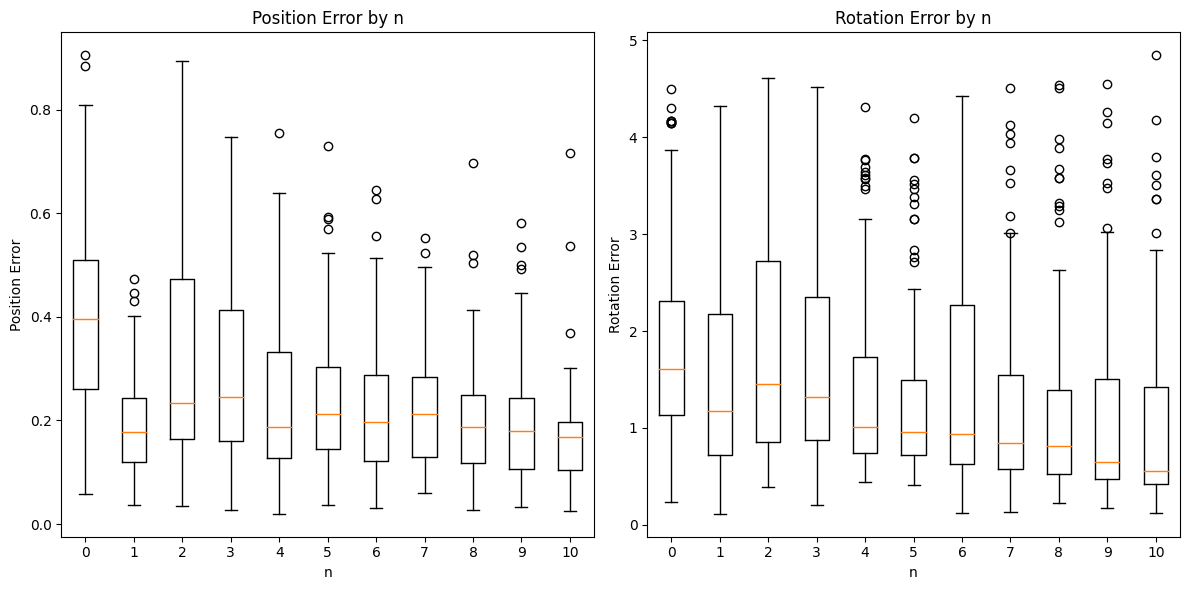

In [4]:
interpolation_sub_df = interpolation_df
no_interpolation_sub_df = no_interpolation_df

# Group by 'n' and calculate summary statistics for both datasets
interpolation_stats = interpolation_sub_df.groupby('n').agg({
    'Position_Error': ['mean', 'std', 'min', 'max'],
    'Rotation_Error': ['mean', 'std', 'min', 'max']
}).reset_index()

no_interpolation_stats = no_interpolation_sub_df.groupby('n').agg({
    'Position_Error': ['mean', 'std', 'min', 'max'],
    'Rotation_Error': ['mean', 'std', 'min', 'max']
}).reset_index()


interpolation_stats.columns = ['n', 'Pos_Err_Mean', 'Pos_Err_Std', 'Pos_Err_Min', 'Pos_Err_Max', 
                               'Rot_Err_Mean', 'Rot_Err_Std', 'Rot_Err_Min', 'Rot_Err_Max']
no_interpolation_stats.columns = ['n', 'Pos_Err_Mean', 'Pos_Err_Std', 'Pos_Err_Min', 'Pos_Err_Max', 
                                  'Rot_Err_Mean', 'Rot_Err_Std', 'Rot_Err_Min', 'Rot_Err_Max']

combined_stats = pd.concat([interpolation_stats, no_interpolation_stats], axis=0).sort_values(by='n').reset_index(drop=True)
combined_stats_rounded = combined_stats.round(2)

print("Interpolation Summary Statistics:")
print(combined_stats_rounded)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for Position Error
axs[0].boxplot([combined_sampled[combined_sampled['n'] == n]['Position_Error'] for n in combined_sampled['n'].unique()])
axs[0].set_title('Position Error by n')
axs[0].set_xlabel('n')
axs[0].set_ylabel('Position Error')
axs[0].set_xticklabels(combined_sampled['n'].unique())

# Box plot for Rotation Error
axs[1].boxplot([combined_sampled[combined_sampled['n'] == n]['Rotation_Error'] for n in combined_sampled['n'].unique()])
axs[1].set_title('Rotation Error by n')
axs[1].set_xlabel('n')
axs[1].set_ylabel('Rotation Error')
axs[1].set_xticklabels(combined_sampled['n'].unique())

# Display the plots
plt.tight_layout()
plt.show()

In [5]:
from scipy.stats import f_oneway

# Assuming 'combined_sampled' is already your DataFrame

# Get unique values of 'n'
unique_n = combined_sampled['n'].unique()

# Prepare lists to store groups for ANOVA
position_error_groups = [combined_sampled[combined_sampled['n'] == n]['Position_Error'] for n in unique_n]
rotation_error_groups = [combined_sampled[combined_sampled['n'] == n]['Rotation_Error'] for n in unique_n]

# print(position_error_groups)
# print(rotation_error_groups)

# Perform ANOVA for Position Error
if len(position_error_groups) > 1:  # Check if there is more than one group to compare
    f_stat_position, p_value_position = f_oneway(*position_error_groups)
    print(f"ANOVA for Position Error: F-statistic = {f_stat_position:.2f}, p-value = {p_value_position}")

    # Check if the p-value is below the significance level (0.05)
    if p_value_position < 0.05:
        print("There is a statistically significant difference in Position Error between the different values of n.")
    else:
        print("There is no statistically significant difference in Position Error between the different values of n.")
else:
    print("Not enough groups to perform ANOVA for Position Error.")

# Perform ANOVA for Rotation Error
if len(rotation_error_groups) > 1:  # Check if there is more than one group to compare
    f_stat_rotation, p_value_rotation = f_oneway(*rotation_error_groups)
    print(f"ANOVA for Rotation Error: F-statistic = {f_stat_rotation:.2f}, p-value = {p_value_rotation}")

    # Check if the p-value is below the significance level (0.05)
    if p_value_rotation < 0.05:
        print("There is a statistically significant difference in Rotation Error between the different values of n.")
    else:
        print("There is no statistically significant difference in Rotation Error between the different values of n.")
else:
    print("Not enough groups to perform ANOVA for Rotation Error.")


ANOVA for Position Error: F-statistic = 25.16, p-value = 3.3028936671062676e-43
There is a statistically significant difference in Position Error between the different values of n.
ANOVA for Rotation Error: F-statistic = 7.03, p-value = 9.094845564557969e-11
There is a statistically significant difference in Rotation Error between the different values of n.
